In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset import XinguDataset
import albumentations as A

In [2]:
aug = A.Compose([
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    ], p=0.8)])


In [3]:
# getting Fold 1 dataset info
train_regions = [1, 2, 6, 7, 8, 9, 10]
test_regions = [3, 4]
train_ds = XinguDataset('./scenes_allbands_ndvi',
                                './truth_masks',
                                range(1,4),
                                train_regions,
                                256,
                                64,
                                reflect_pad=True,
                                transforms=aug)
test_ds = XinguDataset('./scenes_allbands_ndvi',
                               './truth_masks',
                               range(1,4),
                               test_regions,
                               256,
                               256,
                               reflect_pad=True,
                               transforms=False)

In [4]:
print(f'Train ds: {len(train_ds)}')
print(f'Test ds: {len(test_ds)}')

Train ds: 2027
Test ds: 28


In [5]:
print(len(train_ds.msk_patches))

2027


In [6]:
for idx, i in enumerate(test_ds):
    if i[0].shape[1:] != (256,256):
        print(f'{idx}[0]: {i[0].shape}')
    if i[1].shape[1:] != (256,256):
        print(f'{idx}[1]\n: {i[1].shape}')
    

In [13]:
ds_no_aug = XinguDataset('scenes_allbands_ndvi', 'truth_masks', [4,6,7], range(1, 11), 256, 256, reflect_pad=True, transforms=False)
ds_aug = XinguDataset('scenes_allbands_ndvi', 'truth_masks', [4, 6, 8], range(1, 11), 256, 256, reflect_pad=True, transforms=aug)

In [14]:
print(f'ds_no_aug: {len(ds_no_aug)} samples')
print(f'ds_aug: {len(ds_aug)} samples')

ds_no_aug: 201 samples
ds_aug: 201 samples


mask shape: (1, 256, 256)


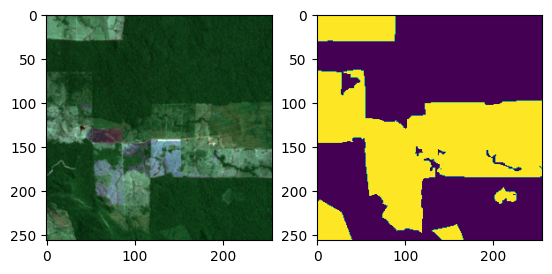

In [15]:
image, mask = ds_no_aug.__getitem__(11)
print(f'mask shape: {mask.shape}')
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

bennis
mask shape: (1, 256, 256)


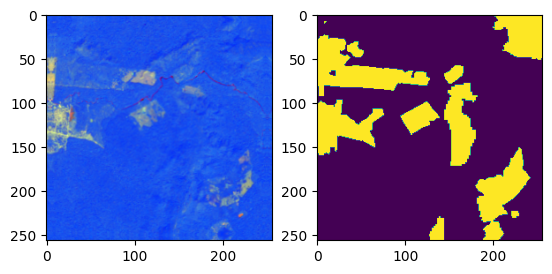

In [18]:
image, mask = ds_aug.__getitem__(8)
print(f'mask shape: {mask.shape}')
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())